In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../src')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *
import os

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Load all data
results = {}
betas = [10, 20, 500, 1000]
for beta in betas:
    results[beta] = {'phis':[]}
    for run in range(1,16):
        fn = f'../../results/BNG07/BNG07-beta-{beta}-run-{run:0>4}'
        params = load_BNG_simulation(fn)
        if run == 1:
            results[beta]['params'] = params
        results[beta]['phis'].append(params['phis'])  
    results[beta]['phis'] = array(results[beta]['phis'])

# Beta = 100 from BNG04
beta = 100
results[100] = {'phis':[]}
for run in range(1,16):
    fn = f'../../results/BNG04/BNG04-pi-peak-run-{run:0>4}'
    params = load_BNG_simulation(fn)
    if run == 1:
        results[beta]['params'] = params
    results[beta]['phis'].append(params['phis'])  
results[beta]['phis'] = array(results[beta]['phis'])


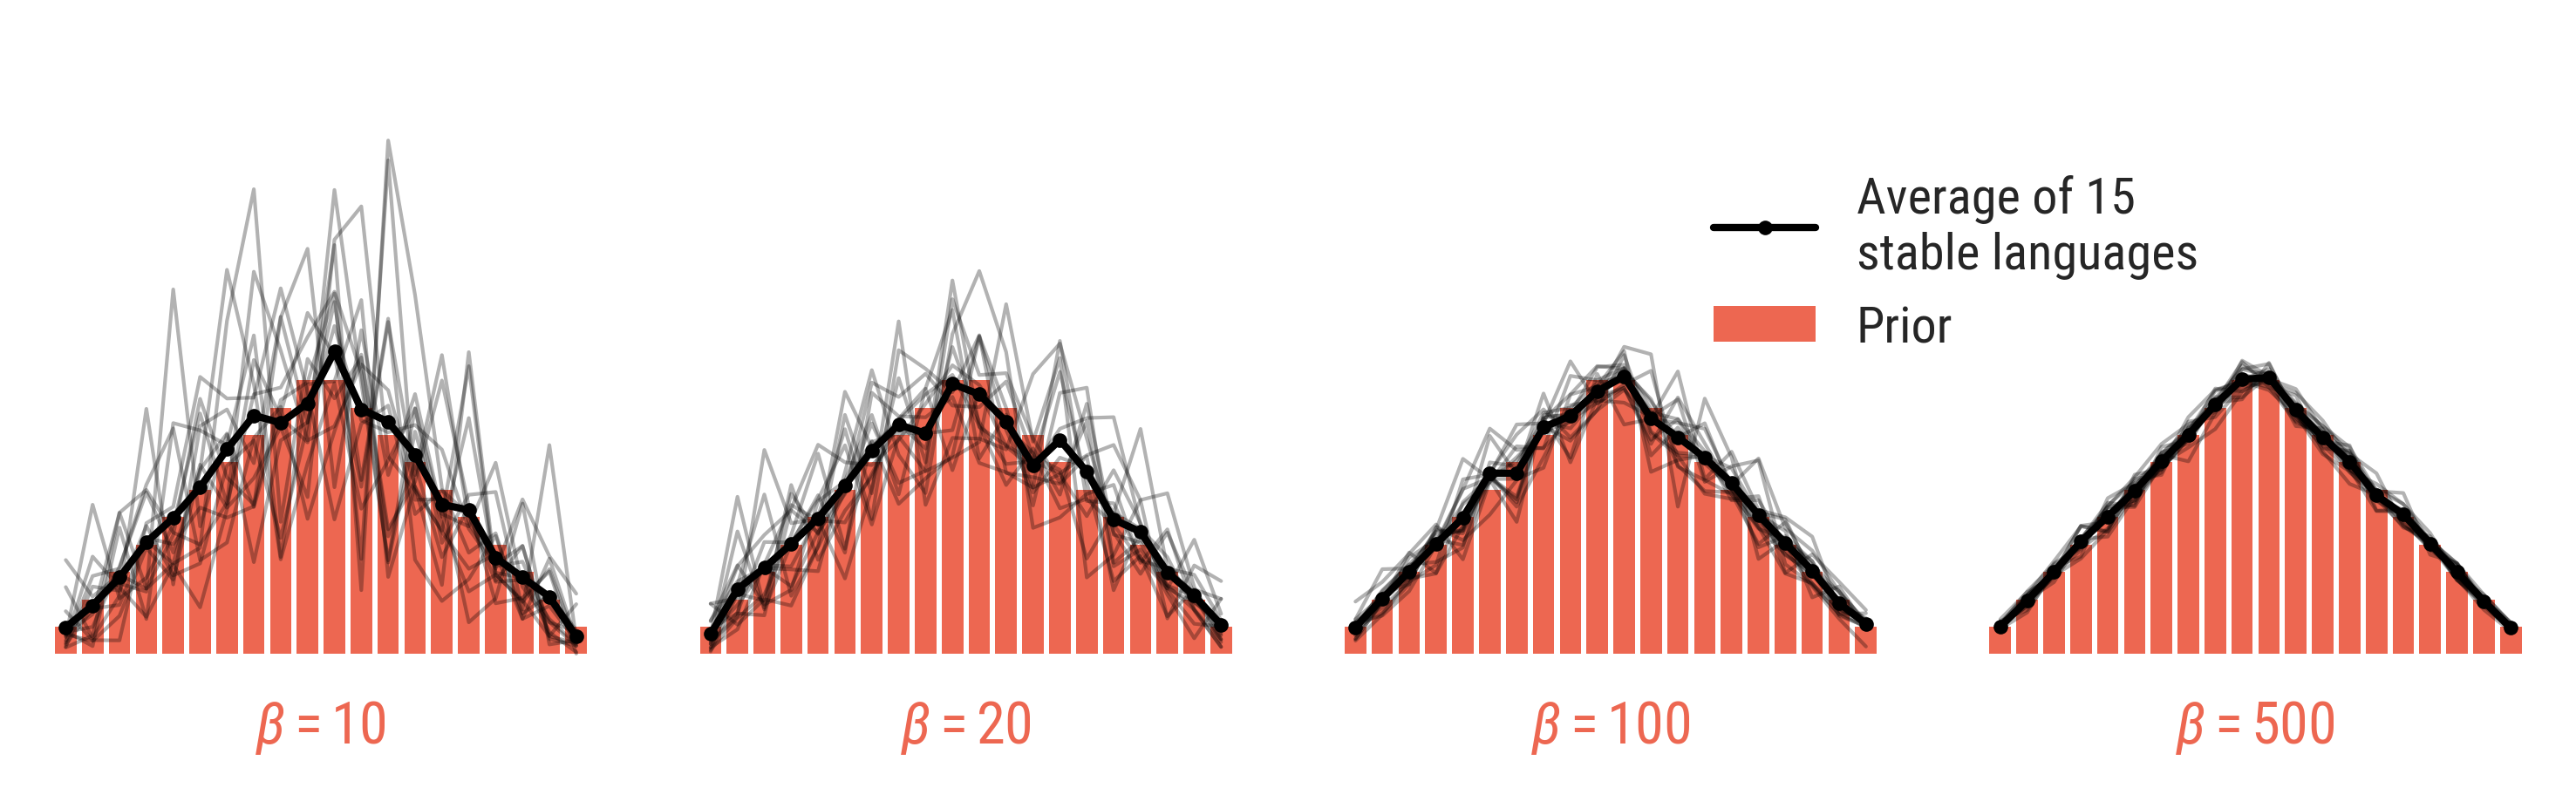

In [33]:
# plot
def show_dist(beta):
    alpha = results[beta]['params']['alpha']
    phis = results[beta]['phis']
    xs = arange(results[beta]['params']['K'])
    
    plot(xs, phis.mean(axis=1).T, 'k', lw=.5, alpha=.3)
    plot(xs, phis.mean(axis=1).mean(axis=0), 'o-k', ms=2, lw=1,
         label='Average of 15\nstable languages')
    pyplot.bar(xs, alpha/sum(alpha), label=r'Prior',
              color=get_color('orange'))
    xlabel(f'$\\beta={beta}$')

figure(figsize=cm2inch(12,3))

ax1 = subplot(141)
show_dist(10)

ax2 = subplot(142, sharey=ax1)
show_dist(20)

ax3 = subplot(143, sharey=ax1)
show_dist(100)

ax4 = subplot(144, sharey=ax1)
show_dist(500)

ylim(-0.005,.2)
yticks([])
for ax in [ax1,ax2,ax3,ax4]:
    sca(ax)
    xticks([])
    xlim(-.5, 19.5)

sns.despine(left=True,bottom=True)
legend(bbox_to_anchor=(.45, .85))

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG07-strenght-of-prior.pdf', bbox_inches='tight')
copyfig('BNG07-strenght-of-prior.pdf')